## Q4

<h3> in this section we want to implement histogram matching </h3>
<h3><b> note : you can't use libraries in this section </b></h3>


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [1]:
def calc_hist(image):
    '''
    Do not use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    hist = np.zeros(256,dtype=int)
    #######################
    #    your code here   #
    
    # with loop implementation
    # img_height = image.shape[0]
    # img_width = image.shape[1]
    # # img_size = img_height * img_width
    # for row in range(img_height):
    #     for col in range(img_width):
    #         hist[image[row][col]] += 1
    
    # without loop implementation
    values, counts = np.unique(image, return_counts=True) # https://numpy.org/doc/stable/reference/generated/numpy.unique.html
    hist[values] = counts
    #######################
    return hist

In [20]:
def calc_cdf(channel):
  '''
    Do not use libraries
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
  '''
  #######################
  #    your code here   #
  cdf = np.zeros(256,dtype=int)
  hist = calc_hist(channel)

  # for loop implementation
  # cdf[0] = hist[0]
  # for i in range(1,256):
  #   cdf[i] = cdf[i-1] + hist[i]
  #   # cdf = cdf / (channel.shape[0] * channel.shape[1]) # normalize (cdf / channel_size)

  # without loop implementation
  cdf = np.cumsum(hist) # https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html

  #######################
  return cdf

In [29]:
def hist_matching(src_image,ref_image):
  '''
  don't use libraries
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image 
  '''
  output_image = src_image.copy()
  channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
  output_image_height = output_image.shape[0]
  output_image_width = output_image.shape[1]
  for channel, title in channels:

    #######################
    #    your code here   #
    src_cdf = calc_cdf(src_image[:,:,channel])
    ref_cdf = calc_cdf(ref_image[:,:,channel])

    for row in range(output_image_height):
        for col in range(output_image_width):
            # output_image[row][col][channel] = np.array(np.where(src_cdf[ src_image[row][col][channel] ] == ref_cdf)).min() # return empty in some values
            output_image[row][col][channel] = np.argmin(np.abs(src_cdf[src_image[row][col][channel]] - ref_cdf)) # finding the corresponding pixel value that minimizes the absolute difference between the CDF values of the source and reference images. # returns the index of the minimum absolute difference between the CDF values of the source and reference images at the current pixel.

    # without loop implementation
    # output_image[:,:,channel] = np.argmin(np.abs(src_cdf[src_image[:,:,channel]] - ref_cdf), axis=0) # https://numpy.org/doc/stable/reference/generated/numpy.argmin.html

    #######################
    
  return output_image

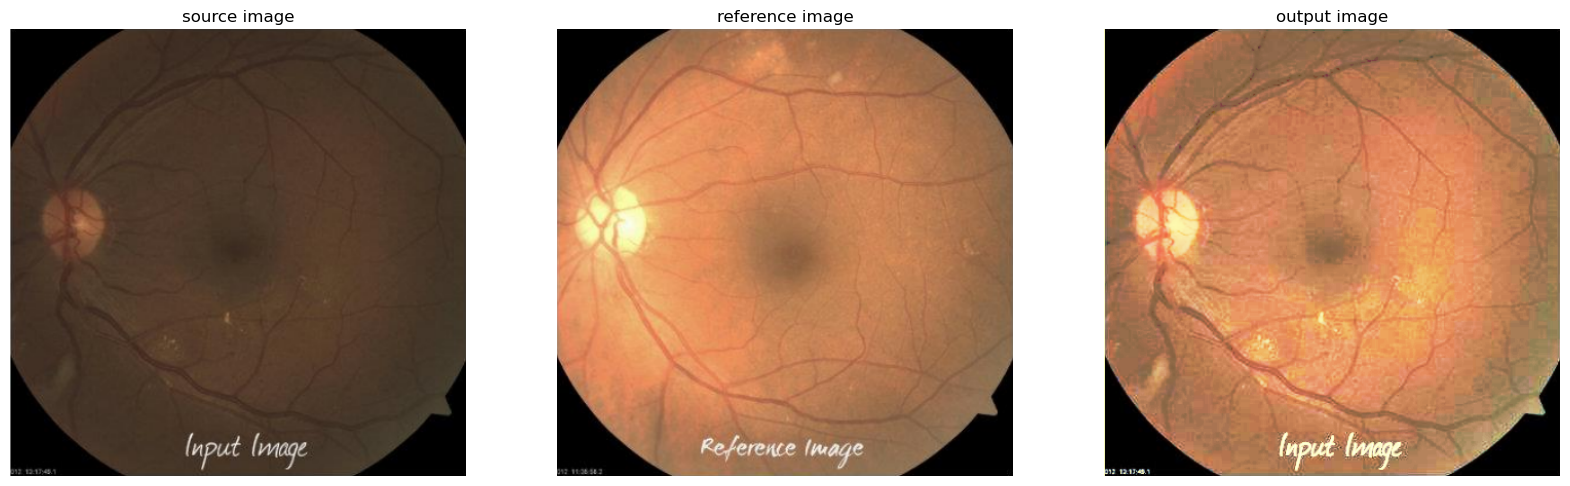

In [30]:
# Do not change this cell
src = cv2.imread('Q4_images/input.png')
ref = cv2.imread('Q4_images/ref.png')
Array = [src, ref, hist_matching(src,ref)]
titles = ['source image', 'reference image', 'output image']
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(Array[i][:,:,::-1]) # ::-1 --> BGR to RGB
  plt.title(titles[i])
  plt.axis('off')

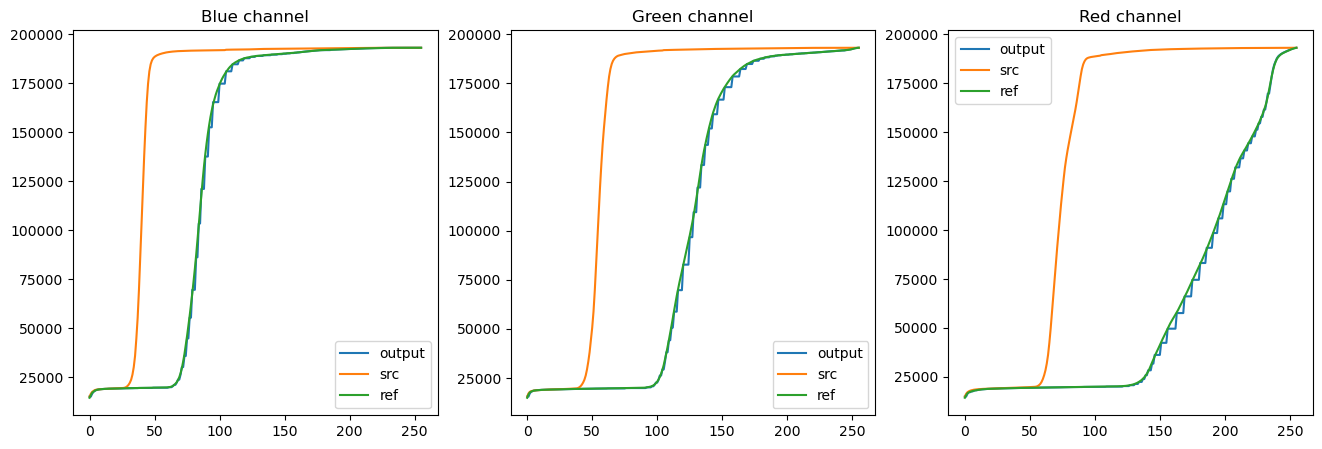

In [6]:
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src,ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_cdf(output[:,:,channel])
    b = calc_cdf(src[:,:,channel])
    c = calc_cdf(ref[:,:,channel])
    plt.plot(a,label='output')
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)

کاربردهایی وجود دارد که ارتقاء تصویر به روش یکنواخت ساختن هیستوگرام بهترین راه حل نیست
در برخی موارد لازم است که هیستوگرام تصویر مورد پردازش مشابه با یک هیستوگرام از پیش تعیین شده
باشد
میتوان ابتدا تابع متعادلسازی هیستوگرام تصویر ورودی را اعمال کرد و سپس معکوس تابع متعادلسازی
تصویر مرجع را بر آن اعمال نمود

Histogram matching یا همان equalization در پردازش تصویر از روشهای مفیدی برای افزایش کیفیت و روشنکردن تصاویر است. این روش به ویژه در موارد زیر مورد استفاده قرار میگیرد:
1- بهبود کیفیت تصویر: در بعضی از تصاویر، نورپردازی نامناسب، تفاوت شدید نور و سایه یا تعداد پیکسلهای خیلی تار در قسمتهای مختلف تصویر باعث شدهاند که تصویر به شکلی کیفیت پایین و نامرغوب باشد. در چنین حالتهایی، با اعمال histogram matching به تصویر میتوانیم کنتراست تصویر را افزایش دهیم و بهبود کیفیت تصویر را ایجاد کنیم.
2- تصحیح رنگها: در بعضی موارد، تصاویر ممکن است با مشکلات رنگی مواجه باشند که مانع از دیدن بهتر تصویر میشود. با اعمال histogram matching میتوانیم تعادل رنگها را بهینه کنیم و تصویر را به شکلی واقعگرایانهتر نمایش دهیم.
3- بازسازی تصاویر قدیمی: در بعضی موارد، تصاویر قدیمی با گذر زمان دچار تغییراتی میشوند و کیفیت آنها کاهش مییابد. با استفاده از histogram matching میتوان تصاویر را به حالت اولیه بازسازی کرد.
در کل، histogram matching یک روش پرکاربرد در پردازش تصویر است که در بسیاری از موارد میتواند کیفیت تصویر را بهبود بخشد و اطلاعات مفیدی را در مورد توزیع رنگها در تصویر فراهم کند.


Histogram matching is a technique used to adjust the pixel intensity values of an image to match a specified target histogram. This technique has several applications in image processing and computer vision, including:

1.Image enhancement: Histogram matching can be used to enhance the visual appearance of an image by adjusting its contrast and brightness. By matching the image histogram to a target histogram with a desired distribution of intensity values, details in the image can become more visible.

2.Color correction: Histogram matching can be used to adjust the color balance of an image by matching the histograms of its color channels to a specified target histogram. This technique can be useful in applications such as photography, where images may have a color cast due to lighting conditions.

3.Image registration: Histogram matching can be used to align two images with different lighting conditions or color balance. By matching the histograms of the two images, the intensity values of corresponding pixels can be made more similar, facilitating image registration.

4.Medical imaging: Histogram matching is commonly used in medical imaging applications to normalize the intensity values of images taken from different imaging modalities or from different patients. This technique can help ensure that the intensity values of corresponding pixels have a consistent meaning across different images.

5.Object recognition: Histogram matching can be used to preprocess images for object recognition applications by normalizing the intensity values of different images to a common distribution. This can help improve the accuracy of object recognition algorithms by reducing the impact of variations in lighting or color balance.

Overall, histogram matching is a powerful technique that can be used to adjust the pixel intensity values of an image to achieve a desired effect or to normalize images for further processing or analysis.

src: https://chat.openai.com/chat